In [1]:
from mindvision.dataset import Mnist

# 下载并处理MNIST数据集
download_train = Mnist(
    path="./mnist",
    split="train",
    batch_size=32,
    repeat_num=1,
    shuffle=True,
    resize=32,
    download=True,
)

download_eval = Mnist(
    path="./mnist", split="test", batch_size=32, resize=32, download=True
)

dataset_train = download_train.run()
dataset_eval = download_eval.run()

[WARNING] ME(11404:16908,MainProcess):2024-04-26-01:48:46.456.812 [mindspore\dataset\core\validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(11404:16908,MainProcess):2024-04-26-01:48:46.457.817 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(11404:16908,MainProcess):2024-04-26-01:48:46.457.817 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(11404:16908,MainProcess):2024-04-26-01:48:46.458.813 [mindspore\dataset\core\validator_helpers.py:744] 'HWC

In [2]:
from mindvision.classification.models import lenet

network = lenet(num_classes=10, pretrained=False)


In [3]:
import mindspore.nn as nn

# 定义损失函数
net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")

# 定义优化器函数
net_opt = nn.Momentum(network.trainable_params(), learning_rate=0.01, momentum=0.9)

In [4]:
from mindspore.train.callback import ModelCheckpoint, CheckpointConfig

# 设置模型保存参数，模型训练保存参数的step为1875
config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)

# 应用模型保存参数
ckpoint = ModelCheckpoint(prefix="lenet", directory="./lenet", config=config_ck)

In [5]:
from mindvision.engine.callback import LossMonitor
from mindspore.train import Model

# 初始化模型参数
model = Model(network, loss_fn=net_loss, optimizer=net_opt, metrics={"accuracy"})

# 训练网络模型，并保存为lenet-1_1875.ckpt文件
model.train(10, dataset_train, callbacks=[ckpoint, LossMonitor(0.01, 1875)])

Epoch:[  0/ 10], step:[ 1875/ 1875], loss:[0.042/0.439], time:10.000 ms, lr:0.01000
Epoch time: 10180.968 ms, per step time: 5.430 ms, avg loss: 0.439
Epoch:[  1/ 10], step:[ 1875/ 1875], loss:[0.017/0.059], time:9.000 ms, lr:0.01000
Epoch time: 9887.465 ms, per step time: 5.273 ms, avg loss: 0.059
Epoch:[  2/ 10], step:[ 1875/ 1875], loss:[0.022/0.043], time:10.000 ms, lr:0.01000
Epoch time: 10100.705 ms, per step time: 5.387 ms, avg loss: 0.043
Epoch:[  3/ 10], step:[ 1875/ 1875], loss:[0.004/0.032], time:9.000 ms, lr:0.01000
Epoch time: 10261.483 ms, per step time: 5.473 ms, avg loss: 0.032
Epoch:[  4/ 10], step:[ 1875/ 1875], loss:[0.020/0.026], time:8.999 ms, lr:0.01000
Epoch time: 9793.327 ms, per step time: 5.223 ms, avg loss: 0.026
Epoch:[  5/ 10], step:[ 1875/ 1875], loss:[0.025/0.024], time:9.050 ms, lr:0.01000
Epoch time: 10186.386 ms, per step time: 5.433 ms, avg loss: 0.024
Epoch:[  6/ 10], step:[ 1875/ 1875], loss:[0.000/0.020], time:9.001 ms, lr:0.01000
Epoch time: 9667.

In [6]:
acc = model.eval(dataset_eval)

print("{}".format(acc))

{'accuracy': 0.9898838141025641}


In [7]:
from mindspore import load_checkpoint, load_param_into_net

# 加载已经保存的用于测试的模型
param_dict = load_checkpoint("./lenet/lenet-1_1875.ckpt")
# 加载参数到网络中
load_param_into_net(network, param_dict)

([],
 ['global_step',
  'learning_rate',
  'momentum',
  'moments.backbone.conv1.weight',
  'moments.backbone.conv2.weight',
  'moments.backbone.fc1.weight',
  'moments.backbone.fc1.bias',
  'moments.backbone.fc2.weight',
  'moments.backbone.fc2.bias',
  'moments.backbone.fc3.weight',
  'moments.backbone.fc3.bias'])

[WARNING] ME(11404:16908,MainProcess):2024-04-26-01:50:28.365.352 [mindspore\dataset\core\validator_helpers.py:744] 'Resize' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Resize' from mindspore.dataset.vision instead.
[WARNING] ME(11404:16908,MainProcess):2024-04-26-01:50:28.365.352 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(11404:16908,MainProcess):2024-04-26-01:50:28.366.352 [mindspore\dataset\core\validator_helpers.py:744] 'Rescale' from mindspore.dataset.vision.c_transforms is deprecated from version 1.8 and will be removed in a future version. Use 'Rescale' from mindspore.dataset.vision instead.
[WARNING] ME(11404:16908,MainProcess):2024-04-26-01:50:28.366.352 [mindspore\dataset\core\validator_helpers.py:744] 'HWC

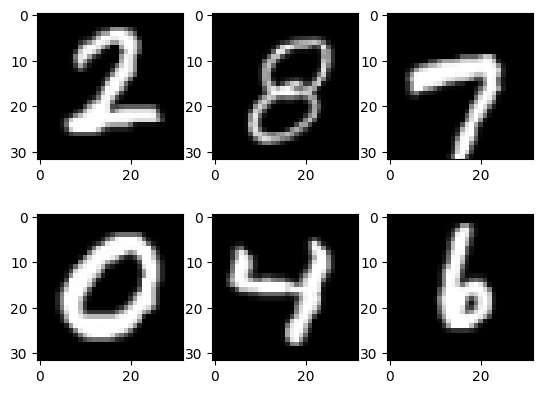

Predicted: "[2 8 7 0 4 6]", Actual: "[2 8 7 0 4 6]"


In [8]:
import numpy as np
from mindspore import Tensor
import matplotlib.pyplot as plt

mnist = Mnist("./mnist", split="train", batch_size=6, resize=32)
dataset_infer = mnist.run()
ds_test = dataset_infer.create_dict_iterator()
data = next(ds_test)
images = data["image"].asnumpy()
labels = data["label"].asnumpy()

plt.figure()
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.imshow(images[i - 1][0], interpolation="None", cmap="gray")
plt.show()

# 使用函数model.predict预测image对应分类
output = model.predict(Tensor(data["image"]))
predicted = np.argmax(output.asnumpy(), axis=1)

# 输出预测分类与实际分类
print(f'Predicted: "{predicted}", Actual: "{labels}"')


# 从上面的打印结果可以看出，预测值与目标值完全一致。

In [ ]:
import mindspore.dataset as ds
import mindspore.dataset.vision as vision
import mindspore.dataset.transforms as transforms
from mindspore.dataset.vision import Inter
import mindspore as ms
import mindspore.nn as nn

from mindspore.common.initializer import Normal
from mindspore.train import (
    Accuracy,
    LossMonitor,
    CheckpointConfig,
    ModelCheckpoint,
    TimeMonitor,
    Model,
)

ms.set_seed(1)


def create_dataset(data_path, batch_size=32, repeat_size=1, num_parallel_workers=1):
    """
    create dataset for train or test
    """
    # define dataset
    mnist_ds = ds.MnistDataset(data_path, shuffle=False)

    resize_height, resize_width = 32, 32
    rescale = 1.0 / 255.0
    shift = 0.0
    rescale_nml = 1 / 0.3081
    shift_nml = -1 * 0.1307 / 0.3081

    # define map operations
    resize_op = vision.Resize(
        (resize_height, resize_width), interpolation=Inter.LINEAR
    )  # Bilinear mode
    rescale_nml_op = vision.Rescale(rescale_nml, shift_nml)
    rescale_op = vision.Rescale(rescale, shift)
    hwc2chw_op = vision.HWC2CHW()
    type_cast_op = transforms.TypeCast(ms.int32)

    # apply map operations on images
    mnist_ds = mnist_ds.map(
        operations=type_cast_op,
        input_columns="label",
        num_parallel_workers=num_parallel_workers,
    )
    mnist_ds = mnist_ds.map(
        operations=resize_op,
        input_columns="image",
        num_parallel_workers=num_parallel_workers,
    )
    mnist_ds = mnist_ds.map(
        operations=rescale_op,
        input_columns="image",
        num_parallel_workers=num_parallel_workers,
    )
    mnist_ds = mnist_ds.map(
        operations=rescale_nml_op,
        input_columns="image",
        num_parallel_workers=num_parallel_workers,
    )
    mnist_ds = mnist_ds.map(
        operations=hwc2chw_op,
        input_columns="image",
        num_parallel_workers=num_parallel_workers,
    )

    # apply DatasetOps
    buffer_size = 10000
    mnist_ds = mnist_ds.shuffle(
        buffer_size=buffer_size
    )  # 10000 as in LeNet train script
    mnist_ds = mnist_ds.batch(batch_size, drop_remainder=True)
    mnist_ds = mnist_ds.repeat(repeat_size)

    return mnist_ds


class LeNet5(nn.Cell):
    """
    Lenet network

    Args:
        num_class (int): Number of classes. Default: 10.
        num_channel (int): Number of channels. Default: 1.

    Returns:
        Tensor, output tensor
    Examples:
    LeNet(num_class=10)

    """

    def __init__(self, num_class=10, num_channel=1, include_top=True):
        super(LeNet5, self).__init__()
        self.conv1 = nn.Conv2d(
            num_channel, 6, 5, pad_mode="valid", weight_init=Normal(0.02)
        )
        self.conv2 = nn.Conv2d(6, 16, 5, pad_mode="valid", weight_init=Normal(0.02))
        self.relu = nn.ReLU()
        self.max_pool2d = nn.MaxPool2d(kernel_size=2, stride=2)
        self.include_top = include_top
        if self.include_top:
            self.flatten = nn.Flatten()
            self.fc1 = nn.Dense(16 * 5 * 5, 120)
            self.fc2 = nn.Dense(120, 84)
            self.fc3 = nn.Dense(84, num_class)

    def construct(self, x):
        x = self.conv1(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        x = self.conv2(x)
        x = self.relu(x)
        x = self.max_pool2d(x)
        if not self.include_top:
            return x
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.fc3(x)
        return x


def train_lenet():
    ms.set_context(mode=ms.GRAPH_MODE, device_target="GPU")
    from mindvision.dataset import Mnist

    # 下载并处理MNIST数据集
    download_train = Mnist(
        path="./mnist",
        split="train",
        batch_size=32,
        repeat_num=1,
        shuffle=True,
        resize=32,
        download=True,
    )

    download_eval = Mnist(
        path="./mnist", split="test", batch_size=32, resize=32, download=True
    )

    dataset_train = download_train.run()
    dataset_eval = download_eval.run()
    data_path = dataset_train
    ds_train = create_dataset(data_path)

    network = LeNet5(10)
    net_loss = nn.SoftmaxCrossEntropyWithLogits(sparse=True, reduction="mean")
    net_opt = nn.Momentum(network.trainable_params(), 0.01, 0.9)
    time_cb = TimeMonitor(data_size=ds_train.get_dataset_size())
    config_ck = CheckpointConfig(save_checkpoint_steps=1875, keep_checkpoint_max=10)
    ckpoint_cb = ModelCheckpoint(prefix="checkpoint_lenet", config=config_ck)
    model = Model(network, net_loss, net_opt, metrics={"Accuracy": Accuracy()})
    summary_dir = "./summary/lenet_test2"
    interval_1 = [x for x in range(1, 4)]
    interval_2 = [x for x in range(7, 11)]
    ##Collector landscape information
    summary_collector = ms.SummaryCollector(
        summary_dir,
        keep_default_action=True,
        collect_specified_data={
            "collect_landscape": {
                "landscape_size": 10,
                "unit": "epoch",
                "create_landscape": {"train": True, "result": True},
                "num_samples": 512,
                "intervals": [interval_1, interval_2],
            }
        },
        collect_freq=1,
    )

    print("============== Starting Training ==============")
    model.train(
        10, ds_train, callbacks=[time_cb, ckpoint_cb, LossMonitor(), summary_collector]
    )


if __name__ == "__main__":
    train_lenet()